In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go


## [制造业采购经理指数(%)](https://data.stats.gov.cn/easyquery.htm?cn=A01&zb=A0B01&sj=202403)

制造业采购经理指数（PMI），是通过对企业采购经理的月度调查结果统计汇总、编制而成的指数，是国际上通用的监测宏观经济走势的先行性指数之一，具有较强的预测、预警作用。PMI是一个综合指数，由5个扩散指数（分类指数）加权计算而成。5个分类指数及其权数是依据其对经济的先行影响程度确定的。具体包括：新订单指数，权数为30%；生产指数，权数为25%；从业人员指数，权数为20%；供应商配送时间指数，权数为15%；原材料库存指数，权数为10%。其中，供应商配送时间指数为逆指数，在合成PMI综合指数时进行反向运算。PMI通常以50%作为经济强弱的分界点，PMI高于50%时，反映制造业经济扩张；低于50%，则反映制造业经济收缩。

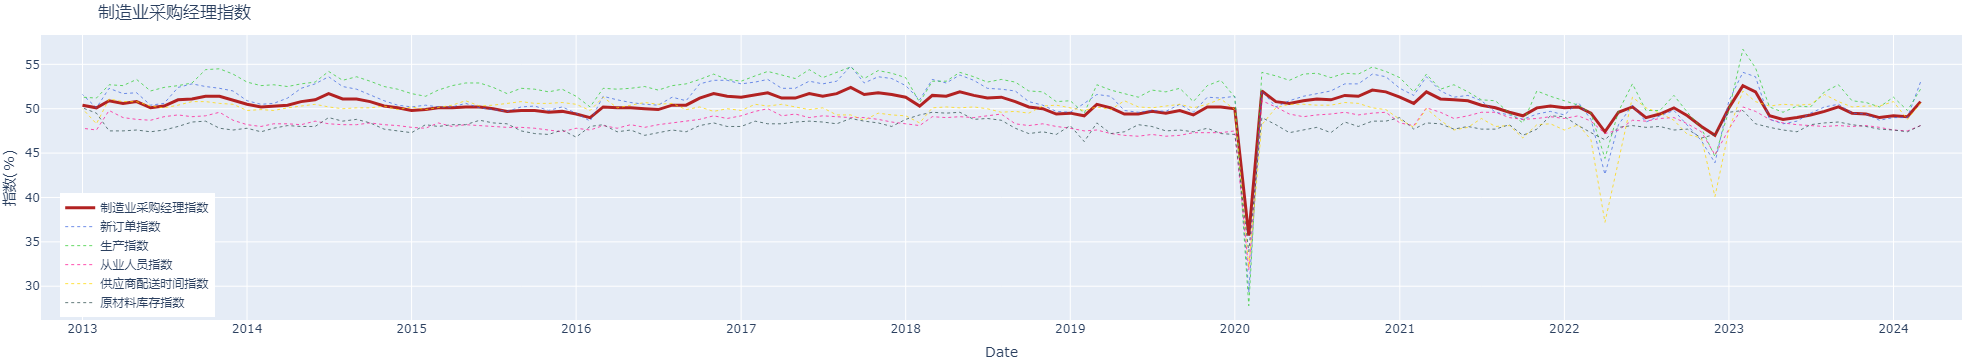

In [61]:
# https://plotly.com/python/line-charts/#line-plot-with-goscatter
# https://en.wikipedia.org/wiki/Web_colors

pmi = pd.read_excel('data/PMI.xls', engine='calamine', index_col=0, skiprows=2, skipfooter=2).T
pmi.index = pd.to_datetime(pmi.index, format='%Y年%m月')
pmi

x = pmi.index

plot_neworder = go.Scatter(x=x, y=pmi['新订单指数(%)'], line=dict(color='royalblue', width=1, dash='dot'), opacity=0.75, name='新订单指数')
plot_production = go.Scatter(x=x, y=pmi['生产指数(%)'], line=dict(color='LimeGreen', width=1, dash='dot'), opacity=0.75, name='生产指数')
plot_worker = go.Scatter(x=x, y=pmi['从业人员指数(%)'], line=dict(color='DeepPink', width=1, dash='dot'), opacity=0.75, name='从业人员指数')
plot_delivery = go.Scatter(x=x, y=pmi['供应商配送时间指数(%)'], line=dict(color='gold', width=1, dash='dot'), opacity=0.75, name='供应商配送时间指数')
plot_stock = go.Scatter(x=x, y=pmi['原材料库存指数(%)'], line=dict(color='DarkSlateGray', width=1, dash='dot'), opacity=0.75, name='原材料库存指数')
plot_pmi = go.Scatter(x=x, y=pmi['制造业采购经理指数(%)'], line=dict(color='firebrick', width=3), name='制造业采购经理指数')

fig = go.Figure([plot_pmi, plot_neworder, plot_production, plot_worker, plot_delivery, plot_stock])

fig.update_layout(
    title='制造业采购经理指数',
    height=680, margin={'t':35, 'b':0, 'l':0, 'r':0},
    xaxis=dict(title="Date", dtick='M12', range=['2012-10-01','2024-06-01']),
    yaxis=dict(title="指数(%)"),
    legend=dict(x=0.01, y=0.01)
)
fig.show()


In [ ]:
ts.loc[(ts.AKZ=='3006939288')&(ts.AssignType=='Direct')]

akz = ts.loc[ts.AssignType=='Direct'].groupby('AKZ')[['OR', 'TO']].sum()
akz.loc[(akz[['OR', 'TO']]!=0).all(axis=1) & (akz.OR==akz.TO)]